# Visualizing the Aftermath of the Easton and Palisades Fires

Author: Joshua Ferrer-Lozano

Date: November 2025

Repository: https://github.com/Awoo56709/eds220-hw4

# README

![README](README.png)

## 1. Import Libraries and Load in Data

In [48]:

# Import required libraries
import os
import numpy as np
import rioxarray as rio
import matplotlib.pyplot as plt
import geopandas as gpd
import xarray as xr


In [49]:
# a,b Activate and Import netCDF4
import netCDF4
# c) Check activation and version
print(netCDF4.__version__)


1.7.3


## Load in Data

In [50]:
# Load fire perimeter shapefiles
eaton = gpd.read_file('data\eaton_fire\Eaton_Perimeter_20250121.shp')

# Load fire perimeter shapefiles
palisades = gpd.read_file('data/Palisades_Perimeter_20250121.shp')

## 3. NetCDF Data Import and Exploration

In [51]:

# Generate variable for path
NC_fp = os.path.join('data','landsat8-2025-02-23-palisades-eaton.nc')

# Use netCDF4
landsat = xr.open_dataset("data/landsat8-2025-02-23-palisades-eaton.nc", engine="netcdf4")



## 2 & 4 Restore and Check Geospatial Information

In [52]:
# Explore the data
print("Eaton Fire Perimeter:")
print(eaton.info())

print("\nPalisades Fire Perimeter:")
print(palisades.info())

Eaton Fire Perimeter:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    20 non-null     int64   
 1   type        20 non-null     object  
 2   Shape__Are  20 non-null     float64 
 3   Shape__Len  20 non-null     float64 
 4   geometry    20 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(1)
memory usage: 932.0+ bytes
None

Palisades Fire Perimeter:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    21 non-null     int64   
 1   type        21 non-null     object  
 2   Shape__Are  21 non-null     float64 
 3   Shape__Len  21 non-null     float64 
 4   geometry    21 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(1)
memor

In [53]:
print(landsat)

<xarray.Dataset> Size: 78MB
Dimensions:      (y: 1418, x: 2742)
Coordinates:
  * y            (y) float64 11kB 3.799e+06 3.799e+06 ... 3.757e+06 3.757e+06
  * x            (x) float64 22kB 3.344e+05 3.344e+05 ... 4.166e+05 4.166e+05
    time         datetime64[ns] 8B ...
Data variables:
    red          (y, x) float32 16MB ...
    green        (y, x) float32 16MB ...
    blue         (y, x) float32 16MB ...
    nir08        (y, x) float32 16MB ...
    swir22       (y, x) float32 16MB ...
    spatial_ref  int64 8B ...


In [54]:
# Check CRS
print(f"Eaton CRS: {eaton.crs}")
print(f"Palisades CRS: {palisades.crs}")

# Check if projected or geographic
print(f"\nIs Eaton CRS geographic? {eaton.crs.is_geographic}")
print(f"Is Palisades CRS geographic? {palisades.crs.is_geographic}")

Eaton CRS: EPSG:3857
Palisades CRS: EPSG:3857

Is Eaton CRS geographic? False
Is Palisades CRS geographic? False


In [55]:

# Explore dimensions and coordinates
print("Dimensions:", landsat.dims)
print("\nCoordinates:", list(landsat.coords))
print("\nData variables:", list(landsat.data_vars))

Dimensions: FrozenMappingWarningOnValuesAccess({'y': 1418, 'x': 2742})

Coordinates: ['y', 'x', 'time']

Data variables: ['red', 'green', 'blue', 'nir08', 'swir22', 'spatial_ref']


In [56]:

# Print Landsat CRS
print(landsat.rio.crs, "\n")

# Print the CRS
print(landsat.spatial_ref.crs_wkt, "\n")

# Retrieve the information
landsat.rio.write_crs(landsat.spatial_ref.crs_wkt, inplace=True)

# Print the CRS of landsat
print("Updated CRS:", landsat.rio.crs, "\n")

None 

PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]] 

Updated CRS: EPSG:32611 



## Brief Summary

The Eaton and Palisades shape files:
- Have the same data types
- Number of columns and column names
- The CRS of both files is the same and projected
- The variables are: 'red', 'green', 'blue', 'nir08', 'swir22', 'spatial_ref'
- The data is three dimensional, with y, x, and time as coordinates
- The landsat data is not geospatially referenced

## 5. True Color Image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


c:\Users\joshu\.conda\envs\eds220-env\Lib\site-packages\matplotlib\cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


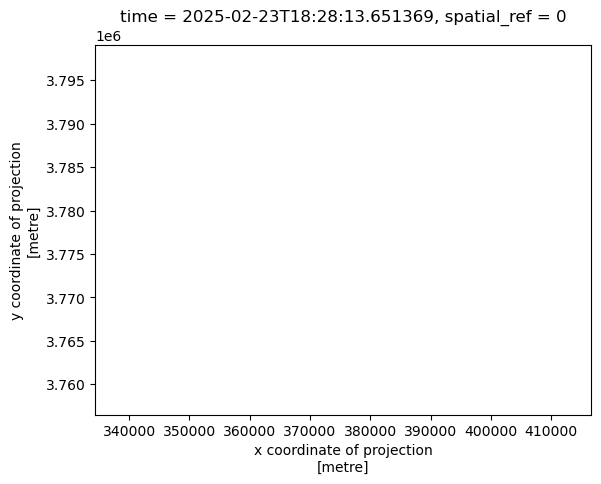

In [57]:
# Select the specified red, green, and blue variables of the xarray and plot
landsat[["red", "green", "blue"]].to_array().plot.imshow()

Bands with NaN values: ['green', 'blue']


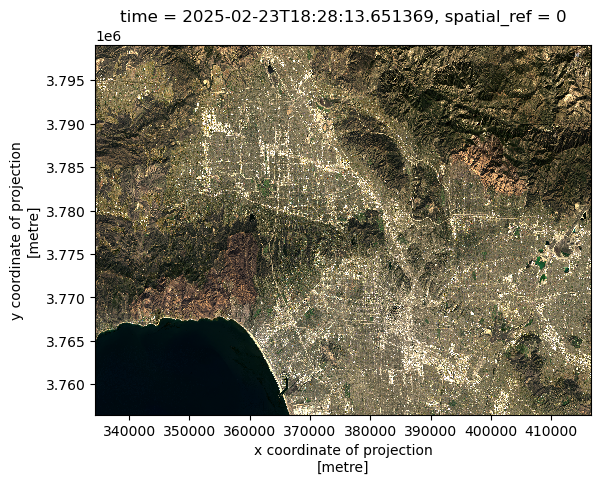

In [58]:

# Identify which bands have nan values using numpy.isnan()
nan_bands = []
for band in ['red', 'green', 'blue', 'nir08', 'swir22']:
    if np.isnan(landsat[band]).any():
        nan_bands.append(band)

print("Bands with NaN values:", nan_bands)

# Substitute any nan values for 0
landsat = landsat.fillna(0)

# Re-plot with the true color image
landsat[['red', 'green', 'blue']].to_array().plot.imshow(robust = True)
plt.show()

## Comparison of Outputs

Part A produced a blank plot with a warning of "Part A produced a blank plot related to  valid range". The RGB values are outliers because of the clouds and prevent accurate plotting.

# 6. False Color Image

Data Cleaning and Visualization - False-Color

In [59]:
# Specify bands and check for nans
bands = ["red", "green", "blue"]

for band in bands:
    has_nan = np.isnan(landsat[band].values).any()
    print(f"{band} contains NaN values? {has_nan}")

red contains NaN values? False
green contains NaN values? False
blue contains NaN values? False


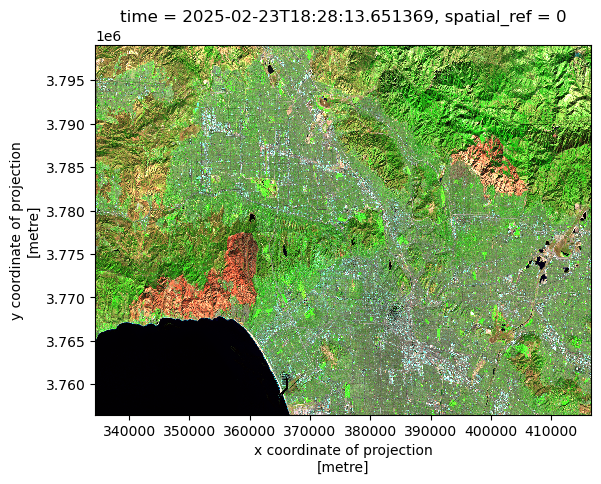

In [60]:
# Specify bands
landsat[['swir22', 'nir08', 'red']].to_array().plot.imshow(robust = True)

## 7. Map the Fires

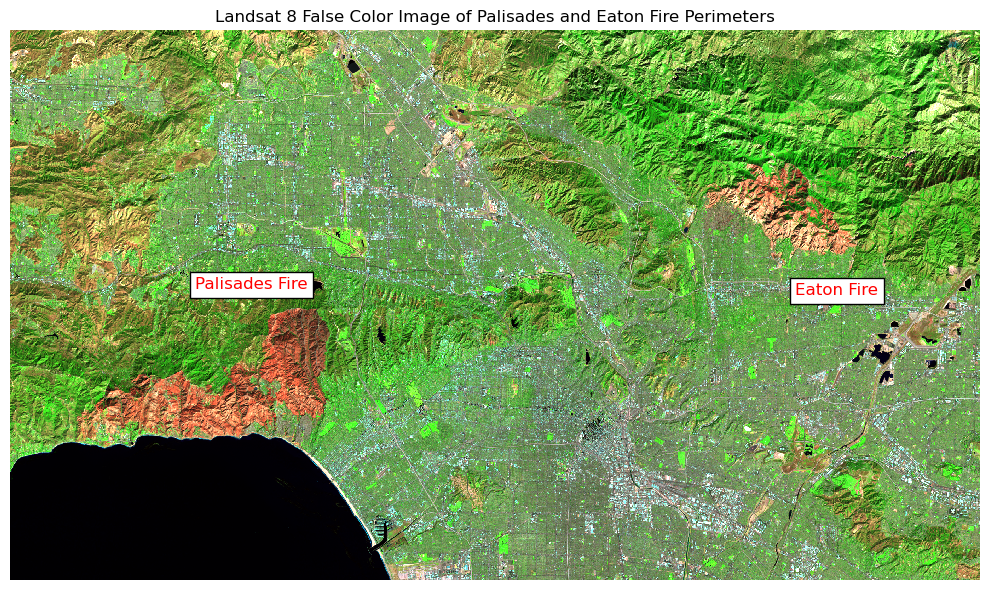

In [61]:
# Create figure
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Add Palisades and Eaton fire perimeters
eaton.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=1,legend=True)
palisades.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=1)


# Add false color raster
landsat[["swir22", "nir08", "red"]].to_array().plot.imshow(robust=True)

# Add title
ax.set_title('Landsat 8 False Color Image of Palisades and Eaton Fire Perimeters')

# Add labels with gray background
plt.figtext(0.20, 0.51, "Palisades Fire", color='red', fontsize=12, bbox=dict(facecolor='white'))
plt.figtext(0.80, 0.50, "Eaton Fire", color='red', fontsize=12, bbox=dict(facecolor='white'))

# Remove axes
ax.axis('off')

# Display the map
plt.tight_layout()
plt.show()

Image Description:

This image is a false color composite image of the Eaton and Palisades fire perimeters from the Landsat 8 satelite. The image utilizes infrared (SWIR), near-infrared (NIR) and red bands. These bands in particular are used to illustrate severity of bruns and vegetation gain/loss.  The intensity of the of the color display the either the severity of burn or the intensity of vegetation recovery.